In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [137]:
train = pd.read_csv("C:\\Users\\virin\\Desktop\\Taxi\\train.csv")

In [138]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435


In [139]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.00,1.53,0.50,1.00,1.00,2.00,2.00,2.00
passenger_count,1458644.00,1.66,1.31,0.00,1.00,1.00,2.00,9.00
pickup_longitude,1458644.00,-73.97,0.07,-121.93,-73.99,-73.98,-73.97,-61.34
pickup_latitude,1458644.00,40.75,0.03,34.36,40.74,40.75,40.77,51.88
dropoff_longitude,1458644.00,-73.97,0.07,-121.93,-73.99,-73.98,-73.96,-61.34
dropoff_latitude,1458644.00,40.75,0.04,32.18,40.74,40.75,40.77,43.92
trip_duration,1458644.00,959.49,5237.43,1.00,397.00,662.00,1075.00,3526282.00


In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


As the count of all the columns are equal we can conclude that there are no missing values

## Getting to know about the dataset

In [141]:
#looking at target variable(trip duration) 
print("Longest trip duration is {} secs : " .format(np.max(train['trip_duration'].values)))
print("Smallest trip duration is {} secs: ".format(np.min(train['trip_duration'].values)))
print("Average trip duration is {} secs".format(np.mean(train['trip_duration'].values)))

Longest trip duration is 3526282 secs : 
Smallest trip duration is 1 secs: 
Average trip duration is 959.4922729603659 secs


We can observe that there are outliers here as the smallest trip duration is 1 second and the longes is around 950 hrs

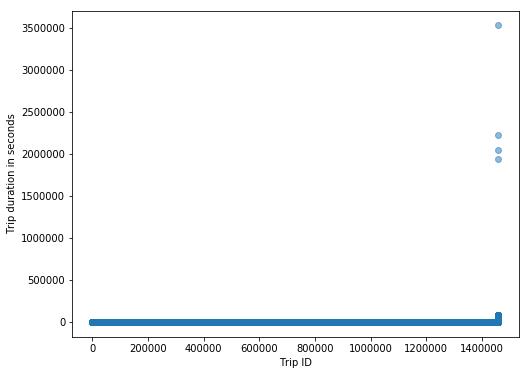

In [10]:
#Visualization is always better 
f = plt.figure(figsize=(8,6))
plt.scatter(range(len(train['trip_duration'])), np.sort(train['trip_duration']), alpha=0.5)
plt.xlabel('Trip ID')
plt.ylabel('Trip duration in seconds')
plt.show()

From the above scatter plot we can see that there are 4 outliers in the target variable. We need to remove those

In [142]:
# Getting to know about passengers column
print("Maximum number of passengers on a trip : ", np.max(train['passenger_count'].values))
print("Minimum number of passengers on a trip : ", np.min(train['passenger_count'].values))
print("Average number of passengers on a trip : ", np.mean(train['passenger_count'].values))

f = plt.figure(figsize=(10,5))
pass_count = train['passenger_count'].value_counts()
print(pass_count)


Maximum number of passengers on a trip :  9
Minimum number of passengers on a trip :  0
Average number of passengers on a trip :  1.66452952194
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64


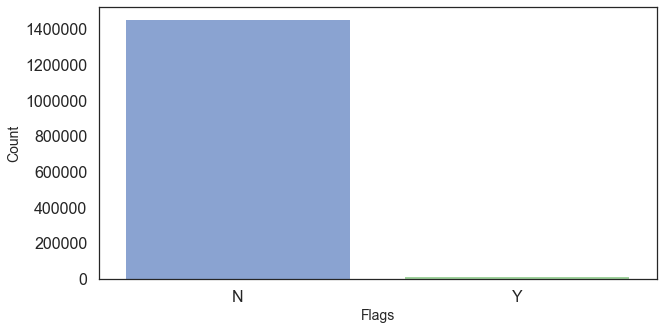

In [143]:
# Let's move to the store_and_fwd_flag column
flags = train['store_and_fwd_flag'].value_counts()

f = plt.figure(figsize=(10,5))
sns.barplot(flags.index, flags.values, alpha=0.7)
plt.xlabel('Flags', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Almost all the journey details were immediately sent to vendors. Very few stored in device memory may be due to bad signal.

Converting the pickup date and drop off date to day month and hour

In [144]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])

train['pickup_day'] = train['pickup_datetime'].dt.day
train['pickup_month'] = train['pickup_datetime'].dt.month
train['pickup_weekday'] = train['pickup_datetime'].dt.weekday
train['pickup_hour'] = train['pickup_datetime'].dt.hour

train['drop_day'] = train['dropoff_datetime'].dt.day
train['drop_month'] = train['dropoff_datetime'].dt.month
train['drop_weekday'] = train['dropoff_datetime'].dt.weekday
train['drop_hour'] = train['dropoff_datetime'].dt.hour

Lets do some EDA on the newly described columns

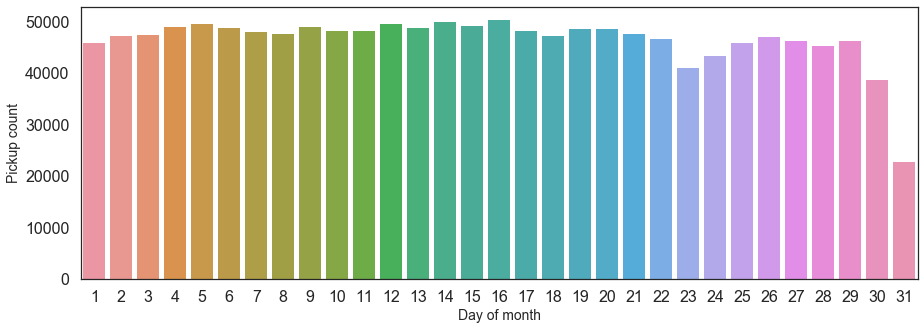

In [166]:
#Checking at what date of a month the number of trips are more
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_day', data=train)
plt.xlabel('Day of month', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

All the days are approximately having same number of trips(We may think 31st have less trips but there only 3 months with 31 days from Jan to June)

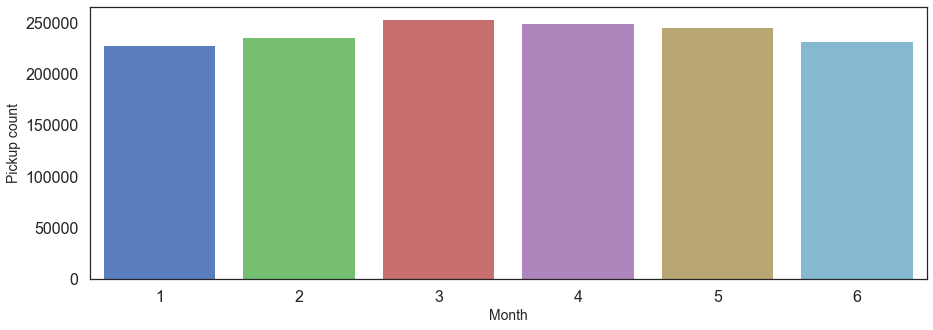

In [167]:
#Lets see if the month affects the number of trips
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_month', data=train)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

More or less every month have approximately same number of trips

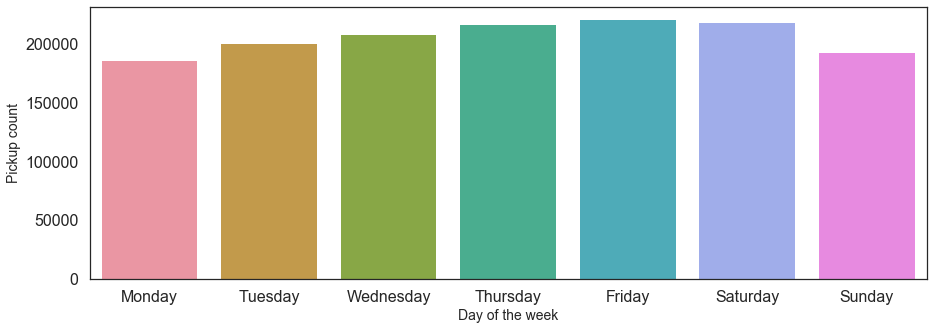

In [168]:
#Lets see if days affect the number of trips
f = plt.figure(figsize=(15,5))
days = [i for i in range(7)]
sns.countplot(x='pickup_weekday', data=train)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.show()

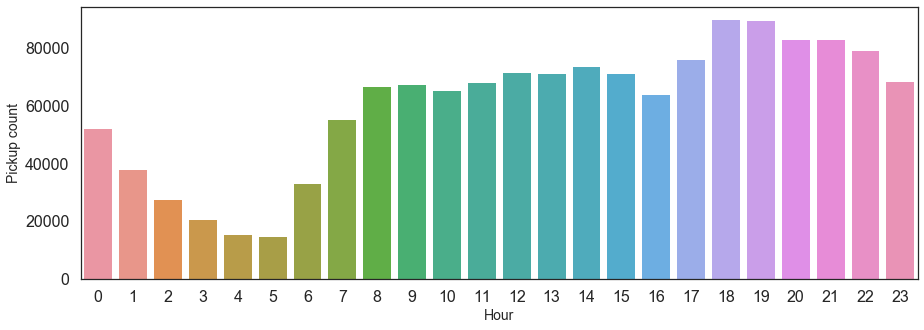

In [169]:
#How about different hours in a day
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_hour', data=train)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

As it is evident that the number of trips in early morning and midnight are less and more after 6:00 PM

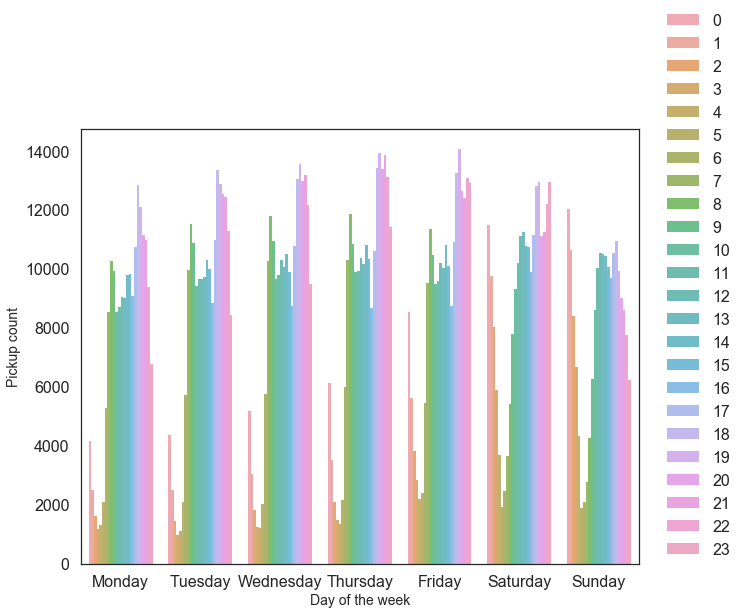

In [170]:
#How about segmenting days with hours 
f = plt.figure(figsize=(10,8))
days = [i for i in range(7)]
sns.countplot(x='pickup_weekday', data=train, hue='pickup_hour', alpha=0.8)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.legend(loc=(1.04,0))
plt.show()

As we can see the early morning rides are more during Saturday and Sunday(As it is weekend and Its party time)

In [145]:
#Defining the boundaries for areas which have the highest density of pickups and dropoffs
west, south, east, north = -74.03, 40.63, -73.77, 40.85

train = train[(train.pickup_latitude> south) & (train.pickup_latitude < north)]


In [146]:
train = train[(train.dropoff_latitude> south) & (train.dropoff_latitude < north)]


In [147]:
train = train[(train.pickup_longitude> west) & (train.pickup_longitude < east)]


In [148]:
train = train[(train.dropoff_longitude> west) & (train.dropoff_longitude < east)]

In [149]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day,pickup_month,pickup_weekday,pickup_hour,drop_day,drop_month,drop_weekday,drop_hour
count,1438626.00,1438626.00,1438626.00,1438626.00,1438626.00,1438626.00,1438626.00,1438626.00,1438626.00,1438626.00,1438626.00,1438626.00,1438626.00,1438626.00,1438626.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,945.99,15.50,3.52,3.05,13.62,15.50,3.52,3.05,13.61
std,0.50,1.31,0.04,0.03,0.03,0.03,5252.16,8.70,1.68,1.95,6.38,8.70,1.68,1.96,6.46
min,1.00,0.00,-74.03,40.63,-74.03,40.63,1.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,394.00,8.00,2.00,1.00,9.00,8.00,2.00,1.00,9.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,656.00,15.00,4.00,3.00,14.00,15.00,4.00,3.00,14.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1059.00,23.00,5.00,5.00,19.00,23.00,5.00,5.00,19.00
max,2.00,6.00,-73.77,40.85,-73.77,40.85,3526282.00,31.00,6.00,6.00,23.00,31.00,7.00,6.00,23.00


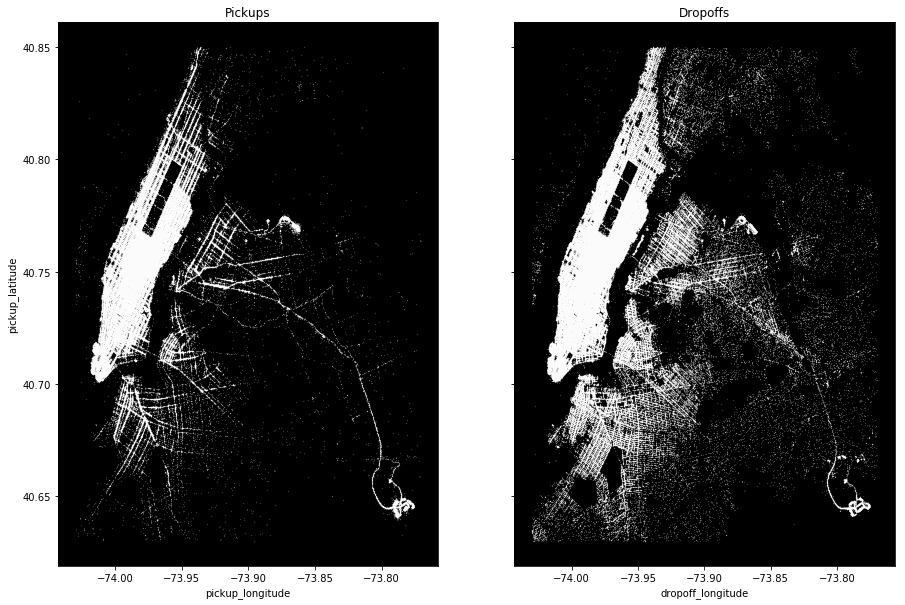

In [87]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))

train.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='white', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Pickups")
ax1.set_facecolor('black')

train.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='white', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Dropoffs")
ax2.set_facecolor('black') 


Looks like the pickups are more in Manhattan area and drop offs are distributed evenly over downtown and residential area(Assumption)

 Univariate Analysis

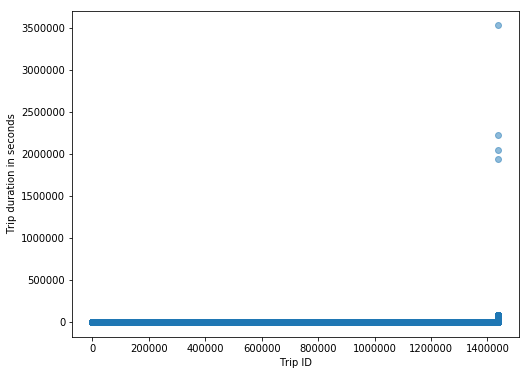

In [25]:
f = plt.figure(figsize=(8,6))
plt.scatter(range(len(train['trip_duration'])), np.sort(train['trip_duration']), alpha=0.5)
plt.xlabel('Trip ID')
plt.ylabel('Trip duration in seconds')
plt.show()

In [151]:
#Deleting outliers
train = train.drop(train[(train['trip_duration']>1600000) & (train['trip_duration']<4000000)].index)

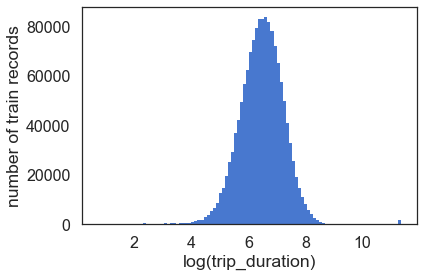

In [152]:
#Applying log transform to remove skewness
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)
plt.hist(train['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

In [153]:
print("Skewness: %f" % train['log_trip_duration'].skew())

Skewness: -0.268602


Not much skewness is observed after log transform

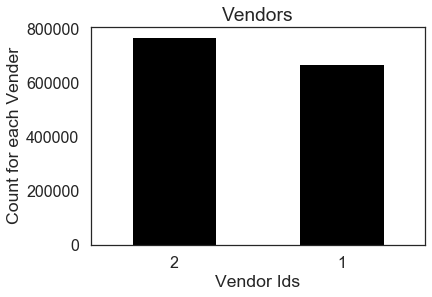

In [154]:
#vendor_id
train["vendor_id"].value_counts().plot(kind='bar',color=["black","gold"])
plt.xticks(rotation='horizontal')
plt.title("Vendors")
plt.ylabel("Count for each Vender")
plt.xlabel("Vendor Ids");

Seems like vendor 2 have more share of taxi rides in the dataset

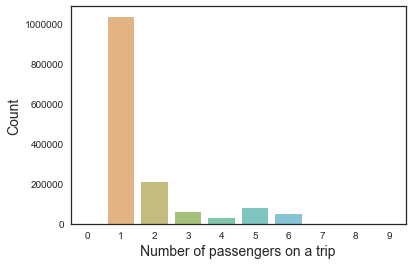

In [1045]:
sns.barplot(pass_count.index, pass_count.values, alpha=0.7)
plt.xlabel('Number of passengers on a trip', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Insights:<br>
1) Most of the trips have only 1 passenger and average being 1.66 <br>
2) There are 60 trips with 0 passengers(which is interesting because no taxi ride can happen without passenger but a taxi may be called to a particular location and customer may be charged for it. )<br>
3) There are 3 trips with 7 passenger count<br>
4) There are 1 trip each for 9 and 8 number of passengers which is an outlier and can remove these rows<br>

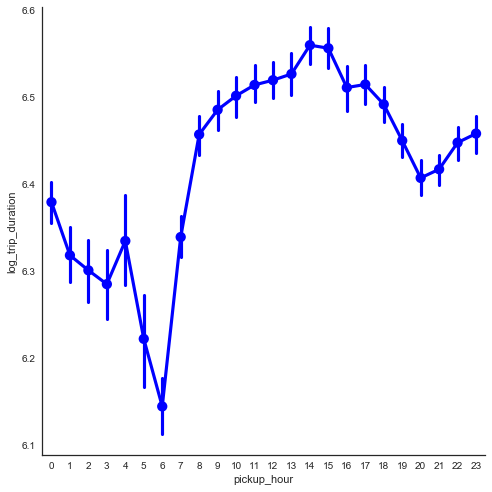

In [1046]:
sns.factorplot(x="pickup_hour", y="log_trip_duration", data=train,color='blue',size=7);

1. Lowest trip durations were in early mornings past midnight. May be people don't want to walk in dark <br>
2. Traffic starts increasing once its 8AM people starting to offices and reaches it's peak around 3 O'Clock in noon.<br>
3. And then starts decreasing slowly and again peaks after 8 till late nigh 11 O'Clock. May be because people going home after work hours.

C:\Users\virin\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435,5


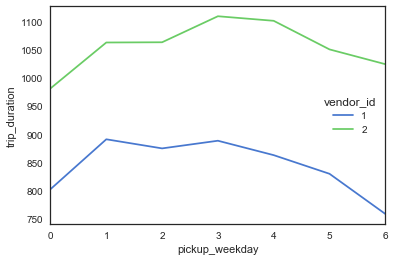

In [885]:
train_t = pd.read_csv("C:\\Users\\virin\\Desktop\\Taxi\\train.csv")
train_t.head()
train_t['pickup_datetime'] = pd.to_datetime(train_t['pickup_datetime'])
train_t['pickup_weekday'] = train_t['pickup_datetime'].dt.weekday
summary_wdays_avg_duration = pd.DataFrame(train_t.groupby(['vendor_id','pickup_weekday'])['trip_duration'].mean())
summary_wdays_avg_duration.reset_index(inplace = True)
summary_wdays_avg_duration['unit']=1
sns.set(style="white", palette="muted", color_codes=True)
#sns.set_context("poster")
sns.tsplot(data=summary_wdays_avg_duration, time="pickup_weekday", unit = "unit", condition="vendor_id", value="trip_duration")
#sns.despine(bottom = False)
train_t.head()

The trip duration for 2nd vendor taxies are higher than 1st vendor

(0, 6000)

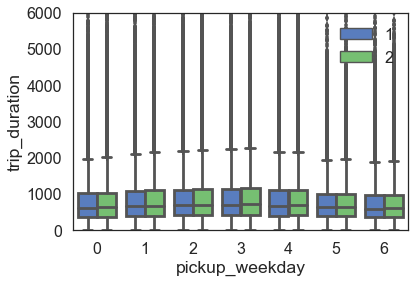

In [875]:
sns.boxplot(x="pickup_weekday", y="trip_duration", hue="vendor_id", data=train_t)
sns.set_context("poster")
plt.legend(loc = 1)
plt.ylim(0, 6000)

Time taken by Monday, Tuesday, Wednesday, and Thursday are greater than rest of the days.

In [156]:
train['store_and_fwd_flag'] = 1 * (train.store_and_fwd_flag.values == 'Y')

Converting categorical to numeric

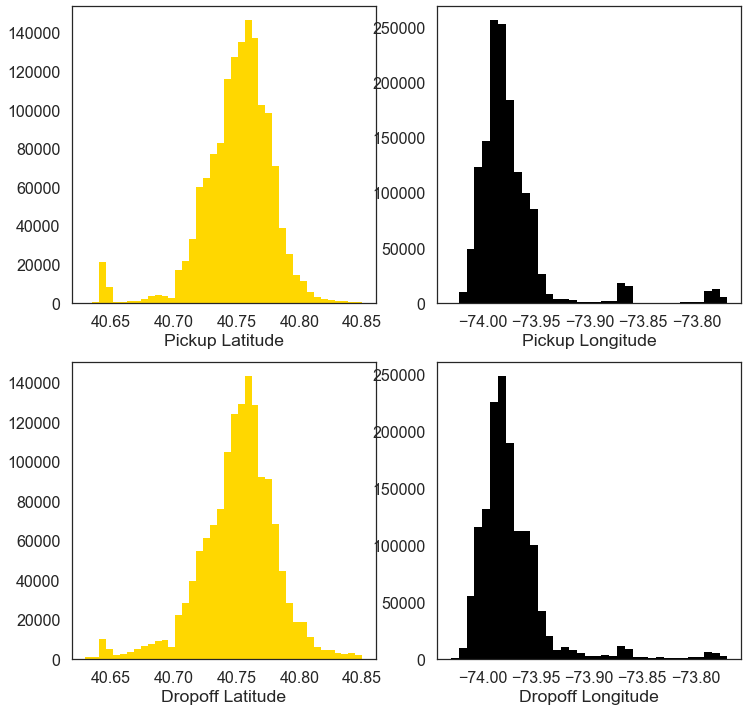

In [157]:
fig, ax = plt.subplots(ncols=2, nrows=2,figsize=(12, 12), sharex=False, sharey = False)
ax[0,0].hist(train.pickup_latitude.values,bins=40,color="gold")
ax[0,1].hist(train.pickup_longitude.values,bins=35,color="black")
ax[1,0].hist(train.dropoff_latitude.values,bins=40,color="gold")
ax[1,1].hist(train.dropoff_longitude.values,bins=35,color="black")
ax[0,0].set_xlabel('Pickup Latitude')
ax[0,1].set_xlabel('Pickup Longitude')
ax[1,0].set_xlabel('Dropoff Latitude')
ax[1,1].set_xlabel('Dropoff Longitude');

# Calculating Distance and Speeds

1. The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes. <br>
2. Degrees of latitude are parallel so the distance between each degree remains almost constant.Each degree of latitude is approximately 69 miles (111 kilometers) .<br>

The lat_diff and lon_diff is to calculate the distance of each trip 

In [158]:
train['lat_diff'] = train['pickup_latitude'] - train['dropoff_latitude']
train['lon_diff'] = train['pickup_longitude'] - train['dropoff_longitude']


In [159]:
#Calculating haversine distance
from haversine import haversine
from scipy.spatial.distance import euclidean , cityblock
train['haversine_distance'] = train.apply(lambda row: haversine( (row['pickup_latitude'], row['pickup_longitude']), 
                                                                (row['dropoff_latitude'], row['dropoff_longitude']) ), axis=1)

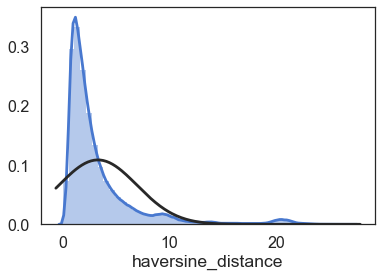

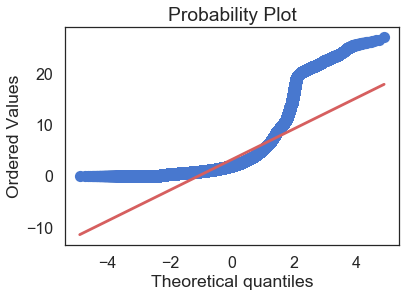

In [165]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
sns.distplot(train['haversine_distance'], fit = norm);
fig = plt.figure()
res = stats.probplot(train['haversine_distance'], plot=plt)
plt.show()

The data is right skewed so apply log tranformation to the feature

In [161]:
#Applying log transform to remove skewness
train['log_haversine_distance'] = np.log1p(train['haversine_distance']) 

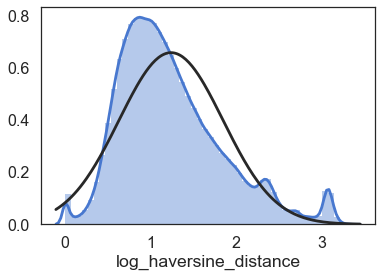

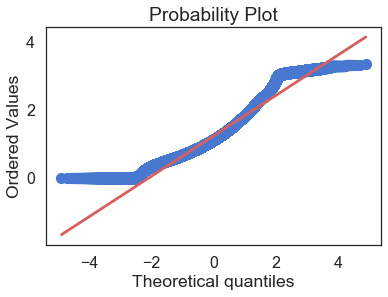

In [162]:
sns.distplot(train['log_haversine_distance'], fit = norm);
fig = plt.figure()
res = stats.probplot(train['log_haversine_distance'], plot=plt)
plt.show()

Much better than the original feature

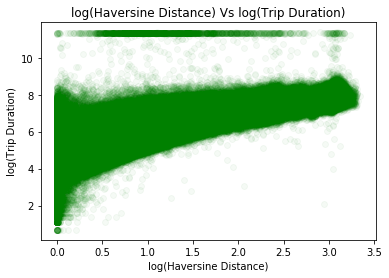

In [161]:
plt.scatter(train.log_haversine_distance,train.log_trip_duration,color="green",alpha=0.04)
plt.ylabel("log(Trip Duration)")
plt.xlabel("log(Haversine Distance)")
plt.title("log(Haversine Distance) Vs log(Trip Duration)");

Linear relationship is observed between trip duration and distance as expected and the data is capped at one point 

Lets calculate Manhattan distance and euclidean distance

In [163]:
from math import sqrt
def manhattan_distance(x,y):
  return sum(abs(a-b) for a,b in zip(x,y))

def euclidean_distance(x,y):
  return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

In [164]:

train['euclidean_distance'] = train.apply(lambda row: euclidean_distance( (row['pickup_latitude'], row['pickup_longitude']), 
                                                                         (row['dropoff_latitude'], row['dropoff_longitude']) ), axis=1)

train['log_euclidean_distance'] = np.log1p(train['euclidean_distance']) 





In [171]:
train['manhattan_distance'] = train.apply(lambda row: manhattan_distance( (row['pickup_latitude'], row['pickup_longitude']), 
                                                                         (row['dropoff_latitude'], row['dropoff_longitude']) ), axis=1)
train['log_manhattan_distance'] = np.log1p(train['manhattan_distance']) 

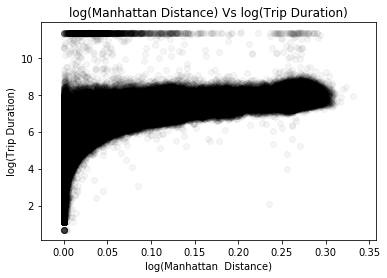

In [171]:
plt.scatter(train.log_manhattan_distance,train.log_trip_duration,color="black",alpha=0.04)
plt.ylabel("log(Trip Duration)")
plt.xlabel("log(Manhattan  Distance)")
plt.title("log(Manhattan Distance) Vs log(Trip Duration)");

Calculating speed by using haversine distance

In [172]:
#Calculating average speed by using Haversine distance
train.loc[:, 'avg_speed_h'] = 1000 * train['haversine_distance'] / train['trip_duration']

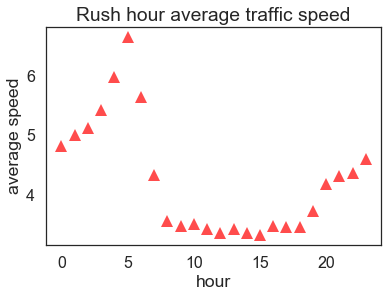

In [173]:
plt.plot(train.groupby('pickup_hour').mean()['avg_speed_h'], '^', lw=2, alpha=0.7,color='red')
plt.xlabel('hour')
plt.ylabel('average speed')
plt.title('Rush hour average traffic speed')
plt.show()

We can observe that the average speed is high on early morning hours and slow between 8:00 AM to 8:00 PM

Here in the dataset dropoff_datetime should be dropped because the algorithm may recognize that by subtracting the dropoff by picup would give the trip_duration

In [176]:
train = train.drop(['dropoff_datetime'], axis =1)

In [177]:
train = train.drop(['pickup_datetime'],axis =1)

In [178]:
#Correlation of features with target variable
corr = train.corr()
print(corr["log_trip_duration"].sort_values(ascending = False))

log_trip_duration         1.00
log_haversine_distance    0.75
haversine_distance        0.63
log_euclidean_distance    0.63
log_manhattan_distance    0.62
euclidean_distance        0.61
manhattan_distance        0.60
trip_duration             0.40
pickup_longitude          0.20
dropoff_longitude         0.16
lon_diff                  0.06
drop_month                0.05
pickup_month              0.05
drop_hour                 0.04
pickup_hour               0.04
passenger_count           0.02
vendor_id                 0.02
store_and_fwd_flag        0.02
pickup_day                0.01
drop_day                  0.01
lat_diff                 -0.00
drop_weekday             -0.03
pickup_weekday           -0.03
avg_speed_h              -0.05
dropoff_latitude         -0.15
pickup_latitude          -0.17
Name: log_trip_duration, dtype: float64


Strong correlation is observed between log_haversine_distance and trip duration

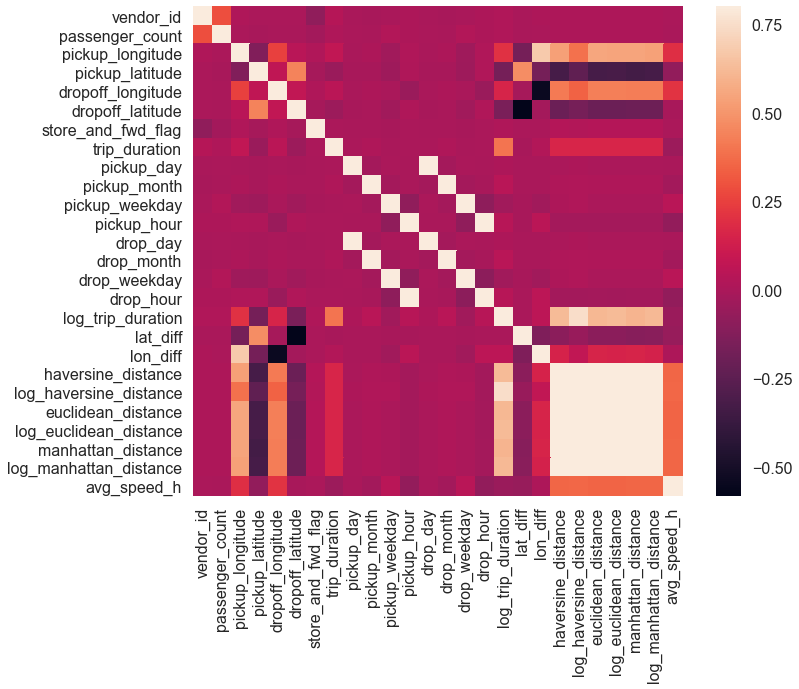

In [181]:
#correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [182]:
train.isnull().sum()

id                        0
vendor_id                 0
passenger_count           0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
store_and_fwd_flag        0
trip_duration             0
pickup_day                0
pickup_month              0
pickup_weekday            0
pickup_hour               0
drop_day                  0
drop_month                0
drop_weekday              0
drop_hour                 0
log_trip_duration         0
lat_diff                  0
lon_diff                  0
haversine_distance        0
log_haversine_distance    0
euclidean_distance        0
log_euclidean_distance    0
manhattan_distance        0
log_manhattan_distance    0
avg_speed_h               0
dtype: int64

Ensuring that there are no null values in the dataset

In [1014]:
#Using 100k instances sue to computational issues
train=train[:100000]

In [1015]:
#replicating the dataset for future usage
train_temp = train

In [1017]:
train_temp = train_temp.drop(['id'],axis =1)

In [1019]:
#storing target variable
y_train1 = train_temp['log_trip_duration']

In [1020]:
#Dropping unnecessary columns in train set
x_train1 = train_temp.drop(['log_trip_duration','trip_duration','haversine_distance','manhattan_distance','euclidean_distance',
                           'drop_weekday','drop_day','drop_hour','drop_month'], axis =1)

# Feature Selection

In [1047]:
# Using Recursive Feature Elimination technique to get feature variables
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=10, step=1)
rfe = rfe.fit(x_train1, y_train1)

In [1048]:
#Choosing 10 best predictor variables
print('Chosen best 10 feature by rfe:',x_train1.columns[rfe.support_])
new_features = x_train1.columns[rfe.support_]

Chosen best 10 feature by rfe: Index(['vendor_id', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'pickup_day', 'pickup_hour', 'log_haversine_distance',
       'log_euclidean_distance', 'log_manhattan_distance', 'avg_speed_h'],
      dtype='object')


Feature ranking:
1. feature 18 (0.436374)
2. feature 20 (0.300013)
3. feature 17 (0.233254)
4. feature 19 (0.010023)
5. feature 0 (0.005036)
6. feature 2 (0.002284)
7. feature 4 (0.001871)
8. feature 5 (0.001720)


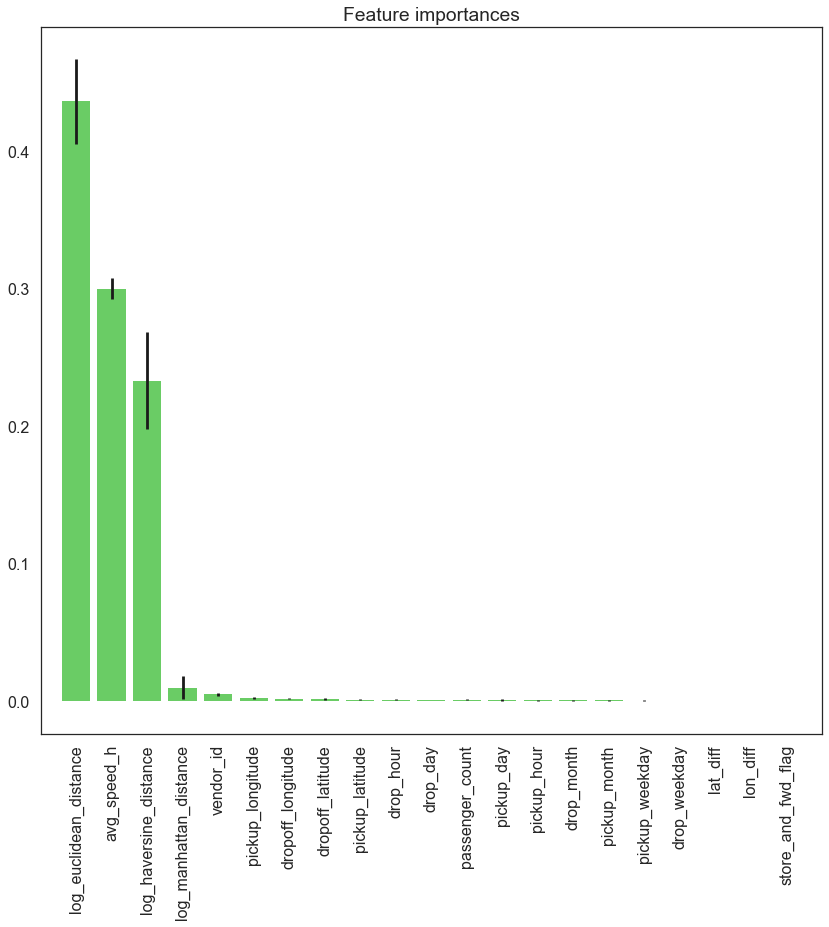

In [240]:
#Using Random Forest Algorithm to get the predictor variables
clf_rf_5 = RandomForestRegressor()      
clr_rf_5 = clf_rf_5.fit(x_train1,y_train1)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train1.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train1.shape[1]), x_train1.columns[indices],rotation=90)
plt.xlim([-1, x_train1.shape[1]])
plt.show()


log_euclidean_distance, avg_speed_h and log_haversine_distance contributes more towards predicting the target variable

In [1022]:
train1 = train_temp
train1.head()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,...,log_trip_duration,lat_diff,lon_diff,haversine_distance,log_haversine_distance,euclidean_distance,log_euclidean_distance,manhattan_distance,log_manhattan_distance,avg_speed_h
0,2,1,-73.98,40.77,-73.96,40.77,0,455,14,3,...,6.12,0.00,-0.02,1.50,0.92,0.02,0.02,0.02,0.02,3.29
1,1,1,-73.98,40.74,-74.00,40.73,0,663,12,6,...,6.50,0.01,0.02,1.81,1.03,0.02,0.02,0.03,0.03,2.72
2,2,1,-73.98,40.76,-74.01,40.71,0,2124,19,1,...,7.66,0.05,0.03,6.39,2.00,0.06,0.06,0.08,0.08,3.01
3,2,1,-74.01,40.72,-74.01,40.71,0,429,6,4,...,6.06,0.01,0.00,1.49,0.91,0.01,0.01,0.02,0.02,3.46
4,2,1,-73.97,40.79,-73.97,40.78,0,435,26,3,...,6.08,0.01,-0.00,1.19,0.78,0.01,0.01,0.01,0.01,2.73


In [1023]:
#Normalizing the data using MinMaxScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(train1)
train_norm = pd.DataFrame(np_scaled, columns = train1.columns)
train_norm.head(5) 

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,...,log_trip_duration,lat_diff,lon_diff,haversine_distance,log_haversine_distance,euclidean_distance,log_euclidean_distance,manhattan_distance,log_manhattan_distance,avg_speed_h
0,1.00,0.17,0.18,0.63,0.25,0.62,0.00,0.01,0.43,0.40,...,0.51,0.52,0.46,0.06,0.27,0.06,0.07,0.05,0.06,0.01
1,0.00,0.17,0.18,0.49,0.12,0.46,0.00,0.01,0.37,1.00,...,0.54,0.53,0.53,0.07,0.31,0.07,0.08,0.07,0.08,0.01
2,1.00,0.17,0.19,0.61,0.09,0.36,0.00,0.02,0.60,0.00,...,0.65,0.65,0.55,0.23,0.60,0.22,0.24,0.20,0.23,0.01
3,1.00,0.17,0.07,0.41,0.07,0.35,0.00,0.00,0.17,0.60,...,0.50,0.55,0.50,0.05,0.27,0.05,0.05,0.04,0.05,0.01
4,1.00,0.17,0.21,0.74,0.22,0.69,0.00,0.01,0.83,0.40,...,0.50,0.54,0.49,0.04,0.23,0.04,0.04,0.03,0.03,0.01


In [1025]:
#Features to be passed to models
feature_names_1 = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_day', 'pickup_month', 'pickup_weekday', 'pickup_hour',
       'lat_diff', 'lon_diff', 'log_haversine_distance',
       'log_euclidean_distance', 'log_manhattan_distance', 'avg_speed_h']
feature_names_1

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'pickup_day',
 'pickup_month',
 'pickup_weekday',
 'pickup_hour',
 'lat_diff',
 'lon_diff',
 'log_haversine_distance',
 'log_euclidean_distance',
 'log_manhattan_distance',
 'avg_speed_h']

In [1027]:
y = train['log_trip_duration'].values

Ensuring that there are no missing values

# Splitting the dataset in to train and validation set

In [1028]:
#Dividing into train and test
import numpy as np
import xgboost as xgb
from sklearn.cross_validation import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train1[feature_names_1].values, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(x_train, label=y_train)
dvalid = xgb.DMatrix(x_val, label=y_val)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

print(len(x_train))
print(len(x_val))
print(y_train.shape)
print(y_val.shape)


80000
20000
(80000,)
(20000,)


# Modelling

# XGBoost

In [837]:
#Hyperparameter tuning for XGBoost algorithm using RandomizedSearchCV
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
clf = xgb.XGBRegressor()
param_grid = {"max_depth": [6,10],
              "min_child_weight": sp_randint(1, 11),
              "reg_lambda": sp_randint(1,3),
              "learning_rate": [0.05,0.01,0.03]}

validator = RandomizedSearchCV(clf, param_distributions= param_grid) 
validator.fit(x_train,y_train)
print(validator.best_score_)
print(validator.best_estimator_.max_depth)
print(validator.best_estimator_.min_child_weight)
print(validator.best_estimator_.reg_lambda)
print(validator.best_estimator_.subsample)
print(validator.best_estimator_.learning_rate)

0.980708829337
6
3
2
1
0.05


In [842]:
#Assinging the parameters
xgb_pars = {'min_child_weight': 3, 'eta': 0.01, 'colsample_bytree': 0.9, 
            'max_depth': 6,
            
'subsample': 0.9, 'lambda': 2., 'nthread': 4, 'booster' : 'gbtree', 'silent': 1,
'eval_metric': 'rmse', 'objective': 'reg:linear'}

In [843]:
model = xgb.train(xgb_pars, dtrain, 10000, watchlist, early_stopping_rounds=50,
                  maximize=False, verbose_eval=100)


[0]	train-rmse:5.94553	valid-rmse:5.94919
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[100]	train-rmse:2.18678	valid-rmse:2.18843
[200]	train-rmse:0.81022	valid-rmse:0.813248
[300]	train-rmse:0.311908	valid-rmse:0.320008
[400]	train-rmse:0.143193	valid-rmse:0.161284
[500]	train-rmse:0.094611	valid-rmse:0.123218
[600]	train-rmse:0.079669	valid-rmse:0.115711
[700]	train-rmse:0.07246	valid-rmse:0.113795
[800]	train-rmse:0.066564	valid-rmse:0.112757
[900]	train-rmse:0.06212	valid-rmse:0.112329
[1000]	train-rmse:0.057866	valid-rmse:0.11204
[1100]	train-rmse:0.054433	valid-rmse:0.111747
Stopping. Best iteration:
[1119]	train-rmse:0.053761	valid-rmse:0.111615



In [844]:
print('Modeling RMSE %.5f' % model.best_score)

Modeling RMSE 0.11162


In [855]:
cv_lb = pd.DataFrame({'training_error': [5.94553,2.18678,0.81022,0.311908,0.143193,0.094611,0.079669,0.07246,0.066564,0.06212,0.057866
                             ,0.054433,0.053761],
                      'validation_error': [5.94919,2.18843,0.813248,0.320008,0.161284,0.123218,0.115711,0.113795,0.112757,0.112329,
                             0.11204,0.111747,0.111615],
                     'iterations':[0,100,200,300,400,500,600,700,800,900,1000,1100,1200] })


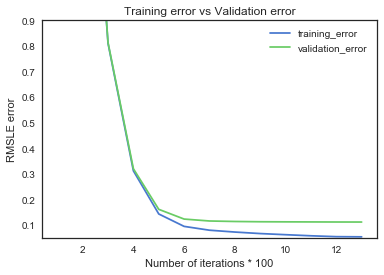

In [866]:
#plotting the trend of training error and validation error
fig,ax = plt.subplots()
ax.plot(range(1, len(cv_lb) + 1), cv_lb['training_error'])
ax.plot(range(1, len(cv_lb) + 1), cv_lb['validation_error'])
ax.legend(loc=0)
ax.set_ylim(0.05, 0.9)
ax.set_xlabel("Number of iterations * 100")
ax.set_ylabel("RMSLE error")
ax.set_title('Training error vs Validation error')


As the training and validation errors are decreasing with number of iterations we can say that there is no overfitting of data

In [1054]:
#makaing predictions on validation data
predictions = model.predict(dvalid)

In [1055]:
#Predicted values
y_pred = np.exp(predictions)-1
print(y_pred[:10])
y_pred = pd.DataFrame(y_pred, columns = ['y_pred'])

[  512.95196533   113.8741684    714.59436035   381.57208252   638.28814697
   432.37124634   987.71459961   658.87103271   827.68536377  1270.76855469]


In [1056]:
#Original values
y_org = np.exp(y_val)-1
print(y_org[:10])
y_org= pd.DataFrame(y_org, columns = ['y_org'])

[  516.   114.   715.   384.   638.   428.   994.   664.   850.  1267.]


In [1058]:
#Comparing the predicted and original values
result = pd.concat([y_pred, y_org], axis=1)
result.head()

,y_pred,y_org
0,512.95,516.00
1,113.87,114.00
2,714.59,715.00
3,381.57,384.00
4,638.29,638.00


# Ridge Regression

In [1004]:
#Hyperparameter tuning using GridSearchCV
from sklearn import datasets
from sklearn.linear_model import Ridge
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
param_grid = {"alpha": [0.01,0.05,0.001,0.0001,0.000001,0.005,0.0005,0.00005]}

validator = GridSearchCV(ridge, param_grid= param_grid) 
validator.fit(x_train,y_train)
print(validator.best_score_)
print(validator.best_estimator_.alpha)

0.695133926443
0.05


In [1059]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.05, solver = 'cholesky')
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [1060]:
#Prediction on validation set
predictions = ridge_reg.predict(x_val)

In [1061]:
#RMSLE value
from sklearn.metrics import mean_squared_error
#tree_pred = pd.DataFrame(predictions)
dec_mse = mean_squared_error(predictions, y_val)
rmse = np.sqrt(dec_mse)
print(rmse) 
#print(tree_reg.score(x_train,y_train))

0.318562964335


In [1062]:
#Comparing the predicted and original values
y_pred = np.exp(predictions)-1
y_org = np.exp(y_val)-1
y_pred = pd.DataFrame(y_pred, columns = ['y_pred'])
y_org= pd.DataFrame(y_org, columns = ['y_org'])
result = pd.concat([y_pred, y_org], axis=1)
result.head()

,y_pred,y_org
0,534.91,516.00
1,173.35,114.00
2,598.39,715.00
3,426.82,384.00
4,440.44,638.00


# Lasso Regression

In [1063]:
#Hyperparameter tuning for Lasso regression
from sklearn import datasets
from sklearn.linear_model import Lasso
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
param_grid = {"alpha": [0.01,0.05,0.001,0.0001,0.000001,0.005,0.0005,0.00005]}

validator = GridSearchCV(ridge, param_grid= param_grid) 
validator.fit(x_train,y_train)
print(validator.best_score_)
print(validator.best_estimator_.alpha)

0.695133926443
0.05


In [1064]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha =0.05, random_state=1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False)

In [1065]:
#Predicting on validation set
predictions = lasso_reg.predict(x_val)

In [1066]:
#RMSLE value for Lasso
from sklearn.metrics import mean_squared_error
dec_mse = mean_squared_error(predictions, y_val)
rmse = np.sqrt(dec_mse)
print(rmse) 

0.359970312166


In [1067]:
#Comparing the predicted and original values
y_pred = np.exp(predictions)-1
y_org = np.exp(y_val)-1
y_pred = pd.DataFrame(y_pred, columns = ['y_pred'])
y_org= pd.DataFrame(y_org, columns = ['y_org'])
result = pd.concat([y_pred, y_org], axis=1)
result.head()

,y_pred,y_org
0,569.58,516.00
1,226.91,114.00
2,605.10,715.00
3,451.68,384.00
4,490.31,638.00


# Random Forest Regressor

In [1049]:
#Tuning hyper parameters using RandomizedSearchCV
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
clf = RandomForestRegressor(random_state =42)
param_grid = {"max_depth": [10,20,30],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11)}

validator = RandomizedSearchCV(clf, param_distributions= param_grid) 
validator.fit(x_train,y_train)
print(validator.best_score_)
print(validator.best_estimator_.n_estimators)
print(validator.best_estimator_.max_depth)
print(validator.best_estimator_.min_samples_split)
print(validator.best_estimator_.min_samples_leaf)
print(validator.best_estimator_.max_features)

0.975999997648
10
20
3
1
9


In [1068]:
rf_model = RandomForestRegressor(max_depth = 20 , min_samples_split= 2, 
                                 min_samples_leaf=5, n_estimators =10, max_features =8)
rf_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [1069]:
#Predicting on validation set
predictions = rf_model.predict(x_val)

In [1070]:
#RMSLE error
from sklearn.metrics import mean_squared_error
#tree_pred = pd.DataFrame(predictions)
dec_mse = mean_squared_error(predictions, y_val)
rmse = np.sqrt(dec_mse)
print(rmse) 
#print(tree_reg.score

0.132378568425


In [1071]:
y_pred = np.exp(predictions)-1
y_org = np.exp(y_val)-1
y_pred = pd.DataFrame(y_pred, columns = ['y_pred'])
y_org= pd.DataFrame(y_org, columns = ['y_org'])
result = pd.concat([y_pred, y_org], axis=1)
result.head()

,y_pred,y_org
0,513.31,516.00
1,111.70,114.00
2,717.67,715.00
3,388.05,384.00
4,636.00,638.00


# Ensemble Learning

In [1076]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from xgboost.sklearn import XGBRegressor

xgb_model = XGBRegressor(objective='reg:linear', n_estimators=10, subsample=0.9, max_depth = 6, min_child_weight = 3
                        ,reg_lambda = 2, learning_rate = 0.05)
rf_model = RandomForestRegressor(max_depth = 20 , min_samples_split= 2, min_samples_leaf=5, n_estimators =10, max_features =8)

In [1077]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin


class AveragingRegressor(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, regressors):
        self.regressors = regressors
        self.predictions = None

    def fit(self, X, y):
        for regr in self.regressors:
            regr.fit(X, y)
        return self

    def predict(self, X):
        self.predictions = np.column_stack([regr.predict(X) for regr in self.regressors])
        return np.mean(self.predictions, axis=1)
    
    
averaged_model = AveragingRegressor([xgb_model, rf_model,lasso_reg,ridge_reg])

In [1078]:
averaged_model.fit(x_train, y_train)
predicitons = averaged_model.predict(x_val)

In [1079]:
from sklearn.metrics import mean_squared_error
#tree_pred = pd.DataFrame(predictions)
dec_mse = mean_squared_error(predictions, y_val)
rmse = np.sqrt(dec_mse)
print(rmse) 

0.132378568425


In [1080]:
y_pred = np.exp(predictions)-1
y_org = np.exp(y_val)-1
y_pred = pd.DataFrame(y_pred, columns = ['y_pred'])
y_org= pd.DataFrame(y_org, columns = ['y_org'])
result = pd.concat([y_pred, y_org], axis=1)
result.head()

,y_pred,y_org
0,513.31,516.00
1,111.70,114.00
2,717.67,715.00
3,388.05,384.00
4,636.00,638.00
